# Dados dos Pilotos da Fórmula 1 de 1950 à 2024

In [91]:
import pandas as pd
import matplotlib.pyplot as plt


In [92]:
# Conectando com todos os CSV
dfCircuitos = pd.read_csv("../../data/raw/DataBaseF1/circuits.csv")
dfConstrutoresResultado = pd.read_csv("../../data/raw/DataBaseF1/constructor_results.csv")
dfConstrutoresClassificacao = pd.read_csv("../../data/raw/DataBaseF1/constructor_standings.csv")
dfConstrutores = pd.read_csv("../../data/raw/DataBaseF1/constructors.csv")
dfPilotosClassificacao = pd.read_csv("../../data/raw/DataBaseF1/driver_standings.csv")
dfPilotos = pd.read_csv("../../data/raw/DataBaseF1/drivers.csv")
dfVoltas = pd.read_csv("../../data/raw/DataBaseF1/lap_times.csv")
dfPitStops = pd.read_csv("../../data/raw/DataBaseF1/pit_stops.csv")
dfQualificacao = pd.read_csv("../../data/raw/DataBaseF1/qualifying.csv")
dfCorridas = pd.read_csv("../../data/raw/DataBaseF1/races.csv")
dfResultadosCorrida = pd.read_csv("../../data/raw/DataBaseF1/results.csv")
dfTemporadas = pd.read_csv("../../data/raw/DataBaseF1/seasons.csv")
dfSprints = pd.read_csv("../../data/raw/DataBaseF1/sprint_results.csv")
dfStatus = pd.read_csv("../../data/raw/DataBaseF1/status.csv")


# Todos os Pilotos Brasileiros da Base de Dados

In [93]:
dfPilotosBrasileiros = dfPilotos[dfPilotos['nationality'] == 'Brazilian']
dfPilotosBrasileiros.sort_values(by='dob', ascending=True, inplace=True)
dfPilotosBrasileiros

C:\Users\gabriel.bressane\AppData\Local\Temp\ipykernel_22412\854747303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPilotosBrasileiros.sort_values(by='dob', ascending=True, inplace=True)


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
622,622,landi,\N,\N,Chico,Landi,1907-07-14,Brazilian,http://en.wikipedia.org/wiki/Chico_Landi
746,746,bianco,\N,\N,Gino,Bianco,1916-07-22,Brazilian,http://en.wikipedia.org/wiki/Gino_Bianco
624,624,ramos,\N,\N,Hernando,da Silva Ramos,1925-12-07,Brazilian,http://en.wikipedia.org/wiki/Hernando_da_Silva...
330,331,bueno,\N,\N,Luiz,Bueno,1937-01-16,Brazilian,http://en.wikipedia.org/wiki/Luiz_Bueno
567,567,orey,\N,\N,Fritz,d'Orey,1938-03-25,Brazilian,http://en.wikipedia.org/wiki/Fritz_d%27Orey
289,290,wilson_fittipaldi,\N,\N,Wilson,Fittipaldi,1943-12-25,Brazilian,http://en.wikipedia.org/wiki/Wilson_Fittipaldi
249,250,pace,\N,\N,Carlos,Pace,1944-10-06,Brazilian,http://en.wikipedia.org/wiki/Carlos_Pace
223,224,emerson_fittipaldi,\N,\N,Emerson,Fittipaldi,1946-12-12,Brazilian,http://en.wikipedia.org/wiki/Emerson_Fittipaldi
236,237,ribeiro,\N,\N,Alex,Ribeiro,1948-11-07,Brazilian,http://en.wikipedia.org/wiki/Alex_Ribeiro
136,137,piquet,\N,\N,Nelson,Piquet,1952-08-17,Brazilian,http://en.wikipedia.org/wiki/Nelson_Piquet


# Pilotos Brasileiros com mais vitórias na Fórmula 1

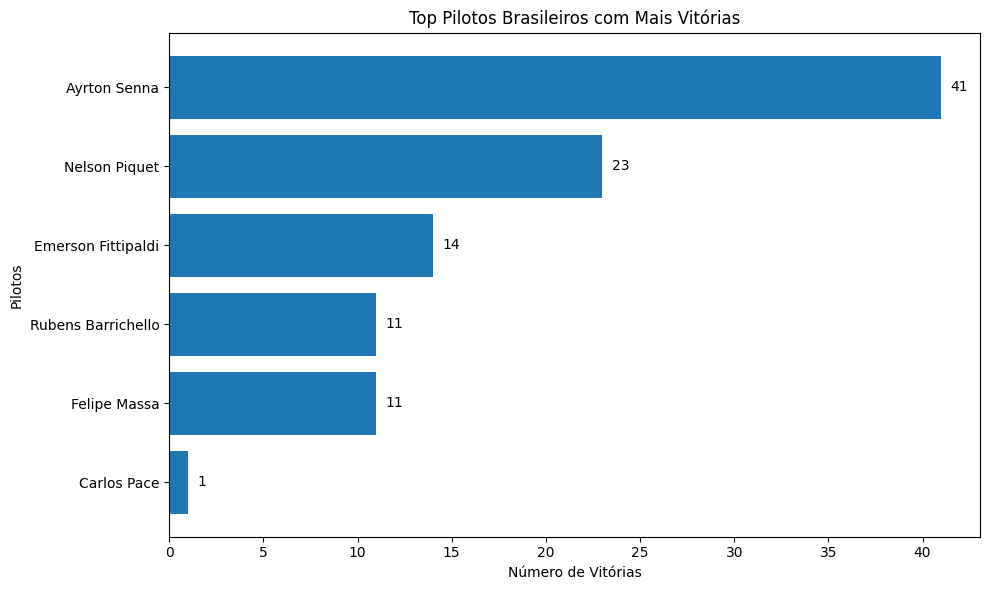

In [94]:
dfPilotosBrasileirosVitorias = dfResultadosCorrida[dfResultadosCorrida['positionOrder'] == 1]
dfPilotosBrasileirosVitorias = dfPilotosBrasileirosVitorias[dfPilotosBrasileirosVitorias['driverId'].isin(dfPilotosBrasileiros['driverId'])]
dfPilotosBrasileirosVitorias = dfPilotosBrasileirosVitorias.merge(dfPilotosBrasileiros[['driverId', 'forename', 'surname', 'dob']], on='driverId', how='left')
dfPilotosBrasileirosVitorias.rename(columns={'dob': 'Data de Nascimento', 'forename': 'Nome', 'surname': 'Sobrenome'}, inplace=True)
dfPilotosBrasileirosVitorias = dfPilotosBrasileirosVitorias.groupby(['driverId', 'Nome', 'Sobrenome', 'Data de Nascimento']).size().reset_index(name='Número de Vitórias').sort_values(by='Número de Vitórias', ascending=True)

#plot 
# plot - top 10 pilotos com mais vitórias
plt.figure(figsize=(10, 6))
plt.barh(
    dfPilotosBrasileirosVitorias['Nome'] + ' ' + dfPilotosBrasileirosVitorias['Sobrenome'],
    dfPilotosBrasileirosVitorias['Número de Vitórias']
)

# Adiciona os números no final das barras
for i, v in enumerate(dfPilotosBrasileirosVitorias['Número de Vitórias']):
    plt.text(
        v + 0.5,  # desloca um pouco pra frente da barra
        i,        # posição na vertical
        str(v),   # texto = número de vitórias
        va='center'
    )

plt.title('Top Pilotos Brasileiros com Mais Vitórias')
plt.xlabel('Número de Vitórias')
plt.ylabel('Pilotos')
plt.tight_layout()
plt.show()


# Pilotos Brasileiros com mais pódios F1

C:\Users\gabriel.bressane\AppData\Local\Temp\ipykernel_22412\1549702664.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPodios.rename(columns={'forename': 'Nome', 'surname': 'Sobrenome'}, inplace=True)


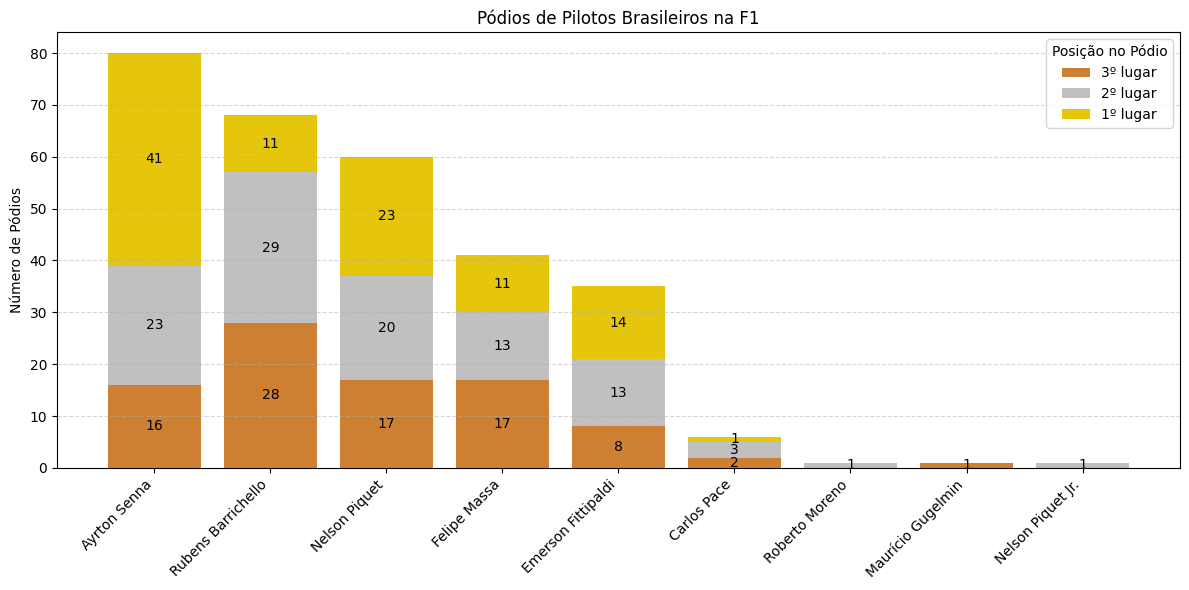

In [95]:
dfBrasileiroResultados = dfPilotosBrasileiros.merge(dfResultadosCorrida[['driverId', 'positionOrder']], on='driverId', how='left')

dfPrimeiro = dfBrasileiroResultados[dfBrasileiroResultados['positionOrder'] == 1].groupby('driverId').size().reset_index(name='primeiro')
dfSegundo  = dfBrasileiroResultados[dfBrasileiroResultados['positionOrder'] == 2].groupby('driverId').size().reset_index(name='segundo')
dfTerceiro = dfBrasileiroResultados[dfBrasileiroResultados['positionOrder'] == 3].groupby('driverId').size().reset_index(name='terceiro')

dfPodios = dfPilotosBrasileiros[['driverId', 'forename', 'surname']]
dfPodios.rename(columns={'forename': 'Nome', 'surname': 'Sobrenome'}, inplace=True)

dfPodios = dfPodios.merge(dfPrimeiro, on='driverId', how='left')
dfPodios = dfPodios.merge(dfSegundo,  on='driverId', how='left')
dfPodios = dfPodios.merge(dfTerceiro, on='driverId', how='left')

dfPodios[['primeiro', 'segundo', 'terceiro']] = dfPodios[['primeiro', 'segundo', 'terceiro']].fillna(0).astype(int)

# Remove linhas onde as três colunas são zero (não teve pódios)
dfPodios = dfPodios[(dfPodios['primeiro'] != 0) | (dfPodios['segundo'] != 0) | (dfPodios['terceiro'] != 0)]
dfPodios['nome_completo'] = dfPodios['Nome'] + ' ' + dfPodios['Sobrenome']
dfPodios['total'] = dfPodios['primeiro'] + dfPodios['segundo'] + dfPodios['terceiro']
dfPodios = dfPodios.sort_values(by='total', ascending=False)


# Plot
plt.figure(figsize=(12, 6))

# Empilhar as barras
bars3 = plt.bar(dfPodios['nome_completo'], dfPodios['terceiro'], color='#cd7f32', label='3º lugar')
bars2 = plt.bar(dfPodios['nome_completo'], dfPodios['segundo'], bottom=dfPodios['terceiro'], color='#c0c0c0', label='2º lugar')
bars1 = plt.bar(dfPodios['nome_completo'], dfPodios['primeiro'], bottom=dfPodios['segundo'] + dfPodios['terceiro'], color="#e6c50d", label='1º lugar')

# Adicionar rótulos em cada barra
for bar in list(bars1) + list(bars2) + list(bars3):
    height = bar.get_height()
    if height > 0:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_y() + height / 2,
            f'{int(height)}',
            ha='center', va='center'
        )


plt.xticks(rotation=45, ha='right')
plt.ylabel('Número de Pódios')
plt.title('Pódios de Pilotos Brasileiros na F1')
plt.legend(title='Posição no Pódio')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


# Maiores Vencedores de Interlagos

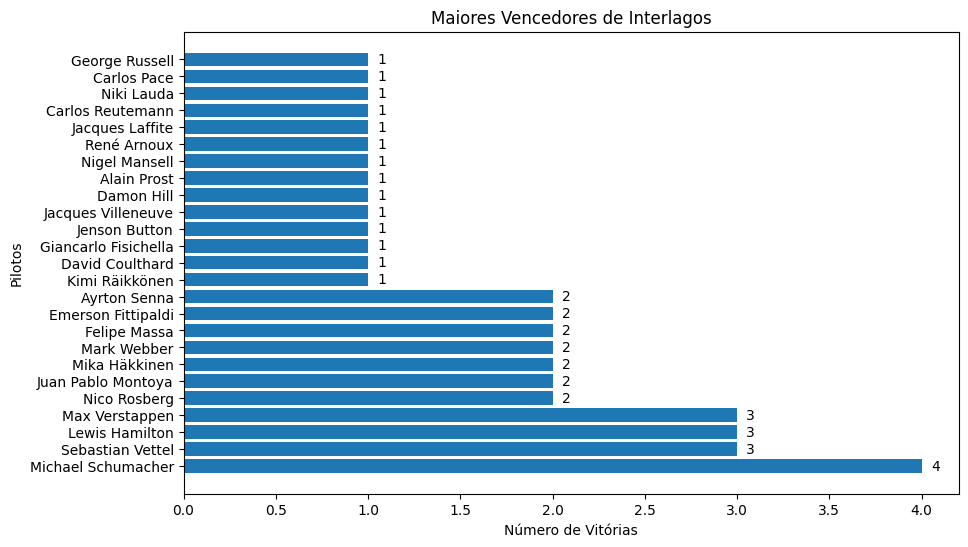

In [96]:
dfVencedoresInterlagos = dfCircuitos[dfCircuitos['circuitRef'] == 'interlagos']
dfVencedoresInterlagos = dfVencedoresInterlagos.merge(dfCorridas[['raceId', 'circuitId']], on='circuitId', how='left')
dfVencedoresInterlagos = dfVencedoresInterlagos.merge(dfResultadosCorrida[['raceId', 'driverId', 'positionOrder']], on='raceId', how='left')
dfVencedoresInterlagos = dfVencedoresInterlagos[dfVencedoresInterlagos['positionOrder'] == 1]
dfVencedoresInterlagos = dfVencedoresInterlagos.merge(dfPilotos[['driverId', 'forename', 'surname', 'dob']], on='driverId', how='left')
dfVencedoresInterlagos.rename(columns={'forename': 'Nome', 'surname': 'Sobrenome', 'dob': 'Data de Nascimento'}, inplace=True)
dfVencedoresInterlagos = dfVencedoresInterlagos.groupby(['driverId', 'Nome', 'Sobrenome', 'Data de Nascimento']).size().reset_index(name='Número de Vitórias').sort_values(by='Número de Vitórias', ascending=False)

#plot
plt.figure(figsize=(10, 6))
plt.barh(
    dfVencedoresInterlagos['Nome'] + ' ' + dfVencedoresInterlagos['Sobrenome'],
    dfVencedoresInterlagos['Número de Vitórias']
)
for i, v in enumerate(dfVencedoresInterlagos['Número de Vitórias']):
    plt.text(
        v + 0.05,  # desloca um pouco pra frente da barra
        i,        # posição na vertical
        str(v),   # texto = número de vitórias
        va='center'
    )

plt.title('Maiores Vencedores de Interlagos')
plt.xlabel('Número de Vitórias')
plt.ylabel('Pilotos')
plt.show()

# Maiores Vencedores em Solo Brasileiro

Text(0, 0.5, 'Pilotos')

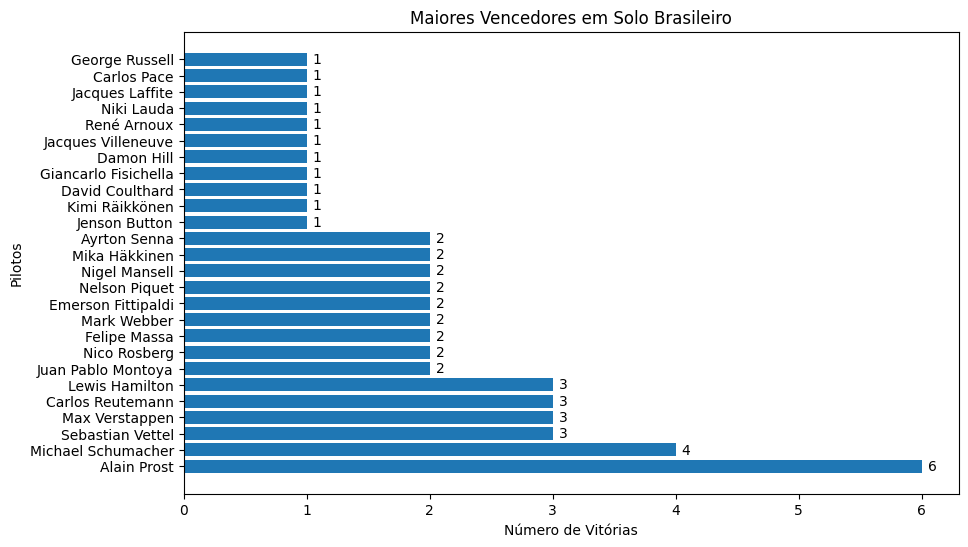

In [ ]:
dfMaioresVencedoresSoloBrasileiro = dfCircuitos
dfMaioresVencedoresSoloBrasileiro = dfMaioresVencedoresSoloBrasileiro[dfMaioresVencedoresSoloBrasileiro['country'] == 'Brazil']
dfMaioresVencedoresSoloBrasileiro = dfMaioresVencedoresSoloBrasileiro.merge(dfCorridas[['raceId', 'circuitId']], on='circuitId', how='left')
dfMaioresVencedoresSoloBrasileiro = dfMaioresVencedoresSoloBrasileiro.merge(dfResultadosCorrida[['raceId', 'driverId', 'positionOrder']], on='raceId', how='left')
dfMaioresVencedoresSoloBrasileiro = dfMaioresVencedoresSoloBrasileiro[dfMaioresVencedoresSoloBrasileiro['positionOrder'] == 1]
dfMaioresVencedoresSoloBrasileiro = dfMaioresVencedoresSoloBrasileiro.merge(dfPilotos[['driverId', 'forename', 'surname', 'dob']], on='driverId', how='left')
dfMaioresVencedoresSoloBrasileiro.rename(columns={'forename': 'Nome', 'surname': 'Sobrenome', 'dob': 'Data de Nascimento'}, inplace=True)
dfMaioresVencedoresSoloBrasileiro = dfMaioresVencedoresSoloBrasileiro.groupby(['driverId', 'Nome', 'Sobrenome', 'Data de Nascimento']).size().reset_index(name='Número de Vitórias').sort_values(by='Número de Vitórias', ascending=False)

# plot
plt.figure(figsize=(10, 6))
plt.barh(
    dfMaioresVencedoresSoloBrasileiro['Nome'] + ' ' + dfMaioresVencedoresSoloBrasileiro['Sobrenome'],
    dfMaioresVencedoresSoloBrasileiro['Número de Vitórias']
)

for i, v in enumerate(dfMaioresVencedoresSoloBrasileiro['Número de Vitórias']):
    plt.text(
        v + 0.05,  # desloca um pouco pra frente da barra
        i,        # posição na vertical
        str(v),   # texto = número de vitórias
        va='center'
    )

plt.title('Maiores Vencedores em Solo Brasileiro')
plt.xlabel('Número de Vitórias')
plt.ylabel('Pilotos')
